In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fft


# سوال ۳)
## الف)
تقریبا منطبق هستند و کاملا منطبق نبودن به علت تقریب هایی است که هنگام تبدیل سیگنال پیوسته به گسسته و بالعکس می‌زنیم.

مثلا در اینجا بعد از تبدیل فوریه معکوس سیگنال ما مقدار موهومی دارد ولی سیگنال اصلی نداشت.

In [2]:
x = np.genfromtxt("Signal.txt", dtype = float)
zarib = 1 / 4000
nyquist = 2000

In [3]:
def fourier(w):
    t = np.linspace(0, 1, 2000)
    tmp = [np.exp(-1j * w * i) for i in t] 
    return np.dot(x, tmp) * zarib

w = np.arange(0, nyquist, 1)
fourier_seri = fourier(w)

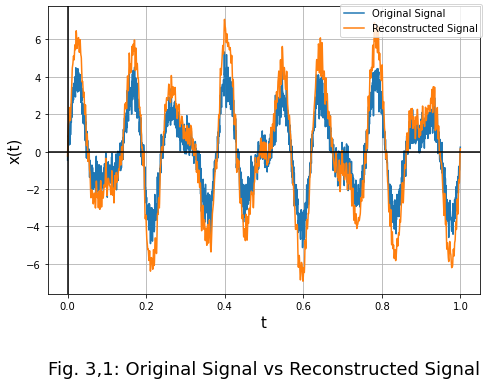

In [4]:
def inverse_fourier(t):
    w = np.arange(0, 2000)
    tmp = [np.exp(1j * i * t) for i in w] 
    return np.dot(fourier_seri, tmp)

t = np.linspace(0, 1, 2000)
inverse_fourier_seri = inverse_fourier(t)

fig = plt.figure()
ax = fig.add_axes([0, .3, 1, 1])

ax.plot(t, x, label = 'Original Signal')
ax.plot(t, np.real(inverse_fourier_seri), label = 'Reconstructed Signal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_xlabel("t", fontsize = 15)
ax.set_ylabel("x(t)", fontsize = 15)

fig.legend(loc = "upper right")

fig.supxlabel("Fig. 3,1: Original Signal vs Reconstructed Signal", fontsize = 18)
plt.savefig('C_Figs/Fig. 3,1.png', dpi=300, bbox_inches='tight')

### ب)
در این قسمت کاملا منطبق هستند

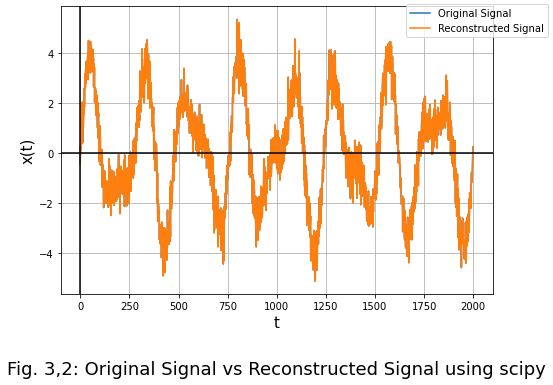

In [5]:
fourier = fft.fft(x)
inverse_fourier = fft.ifft(fourier)

fig = plt.figure()
ax = fig.add_axes([0, .3, 1, 1])

ax.plot(x, label = 'Original Signal')
ax.plot(np.real(inverse_fourier), label = 'Reconstructed Signal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_xlabel("t", fontsize = 15)
ax.set_ylabel("x(t)", fontsize = 15)

fig.legend(loc = "upper right")

fig.supxlabel("Fig. 3,2: Original Signal vs Reconstructed Signal using scipy", fontsize = 18)
plt.savefig('C_Figs/Fig. 3,2.png', dpi=300, bbox_inches='tight')

### ج)

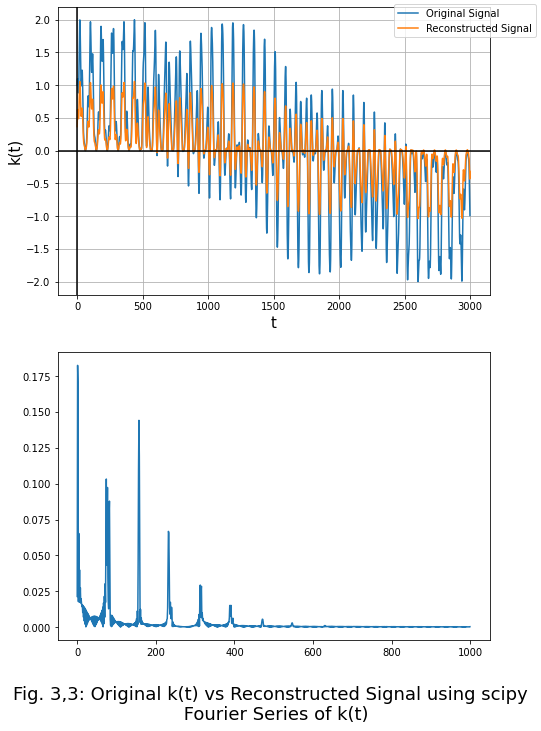

In [6]:
t = np.linspace(0, 3, 3000)
zarib = 1/3000 * 1/2
k = [(1 + np.sin(2 * np.pi * 12 * t_i)) * np.cos(np.sin(2 * np.pi * 25 * t_i) + t_i) for t_i in t]
w = np.arange(0, 1000)

def fourier_func(ww):
    tmp = [np.exp(-1j * ww * t_i) for t_i in t] 
    return np.dot(k, tmp) * zarib

fr = fourier_func(w)

def inverse_fourier_func(tt):
    tmp = [np.exp(1j * w_i * t) for w_i in w] 
    return np.dot(fr, tmp)

in_fr = inverse_fourier_func(t)

fig = plt.figure()
ax1 = fig.add_axes([0, 1.5, 1, 1])
ax2 = fig.add_axes([0, .3, 1, 1])

ax2.plot(np.absolute(fr))

ax1.plot(k, label = 'Original Signal')
ax1.plot(np.real(in_fr), label = 'Reconstructed Signal')
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax1.set_xlabel("t", fontsize = 15)
ax1.set_ylabel("k(t)", fontsize = 15)

fig.legend(loc = "upper right")

fig.supxlabel("Fig. 3,3: Original k(t) vs Reconstructed Signal using scipy \n Fourier Series of k(t)", fontsize = 18)
plt.savefig('C_Figs/Fig. 3,3.png', dpi=300, bbox_inches='tight')

## د)

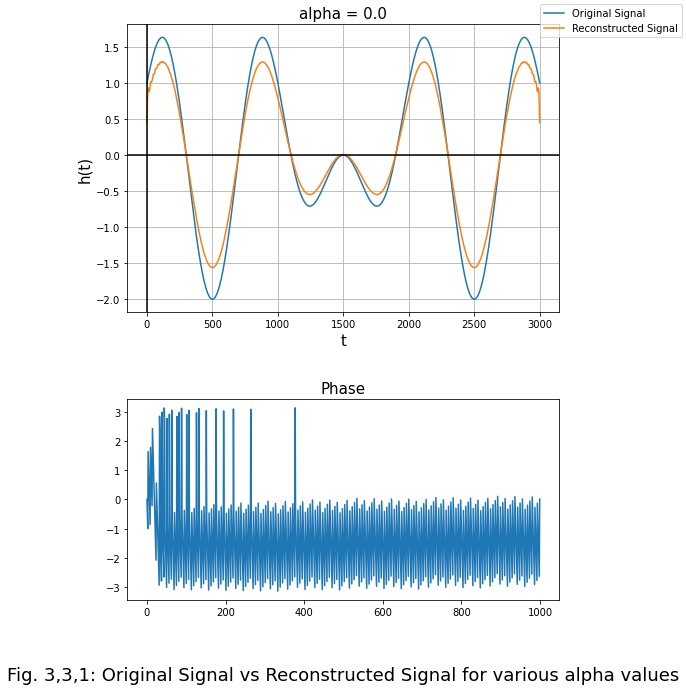

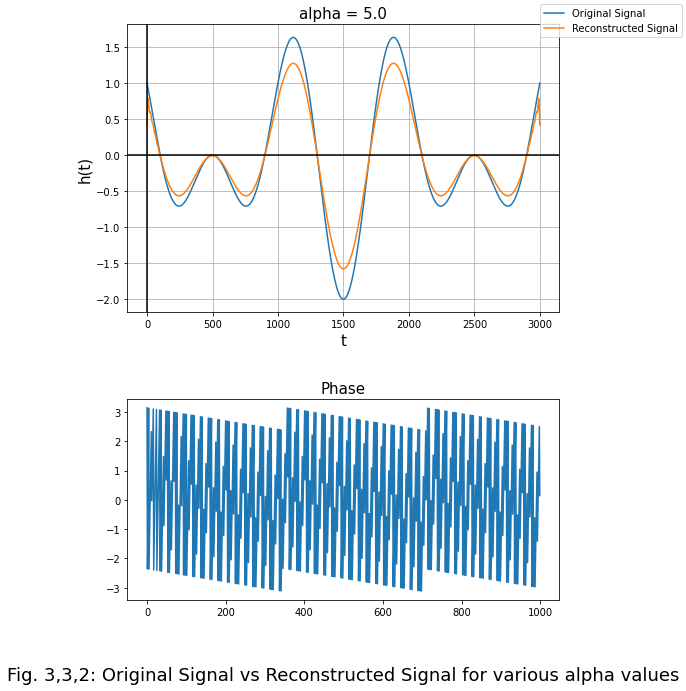

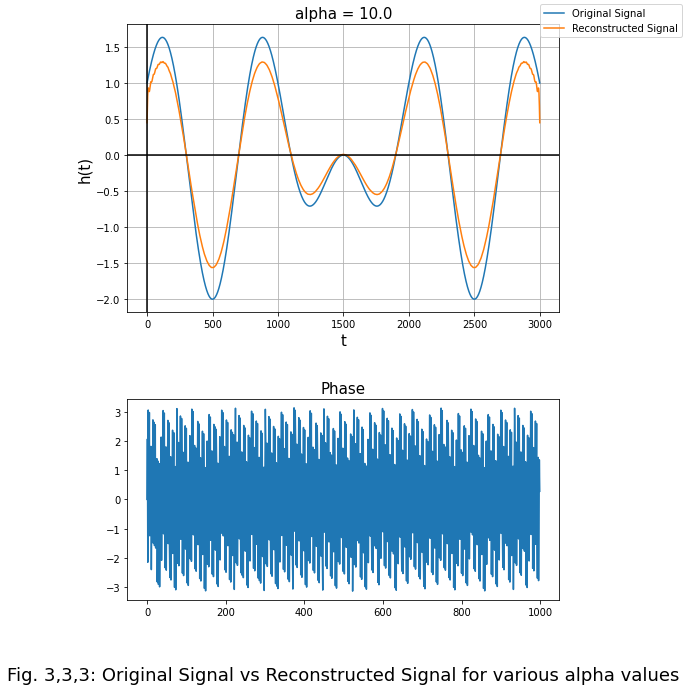

In [7]:
def calculate_fourier(func, w, t):
    tmp = [np.exp(-1j * w * t_i) for t_i in t] 
    return np.dot(func, tmp) * 1 / (4 * len(t))

def calculate_inverse_fourier(four, w, t):
    tmp = [np.exp(1j * w_i * t) for w_i in w] 
    return np.dot(four, tmp)

for turn in range(3):
    t = np.linspace(0, 1, 3000)
    alpha = np.linspace(0, 10, 3)[turn]
    t = t + alpha
    h = np.sin(2 * np.pi * 4.5 * t) + np.cos(2 * np.pi * 3 * t)
    w = np.arange(0, 1000)
    
    fourier_seri = calculate_fourier(h, w, t)
    reconstructed_signal = calculate_inverse_fourier(fourier_seri, w, t)
    
    fig = plt.figure()
    ax = fig.add_axes([ 0, 1.3, 1, 1])
    ax2 = fig.add_axes([0, .3, 1, .7])

    ax2.plot(np.angle(fourier_seri))
    ax2.set_title("Phase", fontsize = 15)
    
    ax.plot(h, label = 'Original Signal')
    ax.plot(np.real(reconstructed_signal), label = 'Reconstructed Signal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

    ax.set_xlabel("t", fontsize = 15)
    ax.set_ylabel("h(t)", fontsize = 15)

    fig.legend(loc = "upper right")
    
    ax.set_title(f'alpha = {alpha}', fontsize = 15)

    fig.supxlabel(f"Fig. 3,3,{turn + 1}: Original Signal vs Reconstructed Signal for various alpha values", fontsize = 18)
    plt.savefig(f'C_Figs/Fig. 3,3,{turn + 1}.png', dpi=300, bbox_inches='tight')
    

## ه)
بلی، فقط شامل سینوس ۱۰هرتزی است.

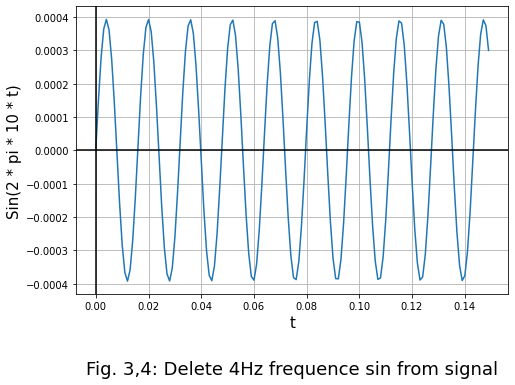

In [9]:
t = np.linspace(0, 2, 2000)
w = np.arange(0, 1000)

m = np.sin(2 * np.pi * 4 * t) + np.sin(2 * np.pi * 10 * t)
m_fourier = calculate_fourier(m, w, t)

sin4 = np.sin(2 * np.pi * 4 * t)
sin4_fourier = calculate_fourier(sin4, w, t)

ans_fourier = m_fourier - sin4_fourier

ans = fft.ifft(ans_fourier)

fig = plt.figure()
ax = fig.add_axes([0, .3, 1, 1])

ax.plot(t[:150], np.real(ans[:150]))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_xlabel("t", fontsize = 15)
ax.set_ylabel("Sin(2 * pi * 10 * t)", fontsize = 15)

fig.supxlabel("Fig. 3,4: Delete 4Hz frequence sin from signal", fontsize = 18)
plt.savefig('C_Figs/Fig. 3,4.png', dpi=300, bbox_inches='tight')